# Install Libraly

In [1]:
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='Tahoma'
print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )

Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3


# Import Data

In [2]:
area_df = pd.read_excel('area-flood.xlsx')
area_df

,Month,GEOCODE,TAMBON_T,TAMBON_E,AMPHOE_CODE,AMPHOE_T,AMPHOE_E,PROV_CODE,PROV_T,PROV_E,COUNT 17 YEAR,CRITERIA,RISK
0,1,120501,ต.ไทรน้อย,Sai Noi,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
1,1,120503,ต.หนองเพรางาย,Nong Phrao Ngai,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
2,1,120504,ต.ไทรใหญ่,Sai Yai,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
3,1,120505,ต.ขุนศรี,Khun Si,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
4,1,120507,ต.ทวีวัฒนา,Thawi Watthana,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27018,12,961106,ต.กาวะ,Kawa,9611,อ.สุไหงปาดี,Su-ngai Padi District,96,จ.นราธิวาส,Narathiwat,2,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
27019,12,961202,ต.ดุซงญอ,Du Song Yo,9612,อ.จะแนะ,Chanae District,96,จ.นราธิวาส,Narathiwat,2,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
27020,12,961301,ต.จวบ,Chuap,9613,อ.เจาะไอร้อง,Cho-airong District,96,จ.นราธิวาส,Narathiwat,7,4-8 ครั้งในรอบ 17 ปี,เสี่ยงปานกลาง
27021,12,961302,ต.บูกิต,Bu Kit,9613,อ.เจาะไอร้อง,Cho-airong District,96,จ.นราธิวาส,Narathiwat,6,4-8 ครั้งในรอบ 17 ปี,เสี่ยงปานกลาง


In [3]:
spatial_df = pd.read_excel('spatial-rain.xlsx')
spatial_df

,ProvinceID,ProvinceName,MinRain,MaxRain,AvgRain,Year,Month,Date
0,10,กรุงเทพมหานคร,54.299999,257.230011,142.119137,2018,1,2018-01-01
1,11,สมุทรปราการ,76.250000,256.100006,137.302046,2018,1,2018-01-01
2,12,นนทบุรี,38.360001,161.470001,113.433771,2018,1,2018-01-01
3,13,ปทุมธานี,51.439999,116.500000,82.901688,2018,1,2018-01-01
4,14,พระนครศรีอยุธยา,8.850000,88.589996,39.960089,2018,1,2018-01-01
...,...,...,...,...,...,...,...,...
4307,92,จ.ตรัง,144.910004,486.070007,251.035166,2022,8,2022-01-08
4308,93,จ.พัทลุง,97.550003,223.020004,152.586473,2022,8,2022-01-08
4309,94,จ.ปัตตานี,185.789993,220.100006,197.442772,2022,8,2022-01-08
4310,95,จ.ยะลา,165.990005,211.300003,196.459257,2022,8,2022-01-08


In [4]:
Master_df = pd.read_excel('Province-Master.xlsx')
Master_df

,ProvinceNo,ProvinceMOI_ID,ProvinceNameThai,Region_VaccineRollout_MOPH,Region_RDPB,Region_RedCrossChapter,Region_SenatorFieldWork,Region_JFO,Region_TCGOffice,RegionID,...,Region_WaterResourceOffice,Region_DMCR,DistrictOffice_NBTC,RegionalOffice_NBTC,Region_CODIOffice,Region_MD_BranchOffice,Region_MD_MarineOffice,Region_ThailandPost,Region_OccupationalSafety,Region_PrimaryIndustry_Mineral
0,1,10,กรุงเทพมหานคร,กรุงเทพมหานครและปริมณฑล,ภาคกลาง,NaN,NaN,ส่วนกลาง,สำนักงานเขตนครหลวง,7,...,ส่วนกลาง,สำนักงานทรัพยากรทางทะเลและชายฝั่งที่ 8,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคกรุงเทพฯ ปริมณฑลและตะวันออก,ส่วนกลาง,ส่วนกลาง,"สำนักงานไปรษณีย์นครหลวง 1, สำนักงานไปรษณีย์นคร...","ศูนย์ความปลอดภัยในการทำงานเขต 11 (ตลิ่งชัน), ศ...",สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 7...
1,2,81,จังหวัดกระบี่,ภาคใต้,ภาคใต้,เหล่ากาชาดจังหวัดภาค 11,ภาคใต้,ภาคใต้,สำนักงานเขตภาคใต้ตอนบน,2,...,สำนักงานทรัพยากรน้ำภาค 10,สำนักงานทรัพยากรทางทะเลและชายฝั่งที่ 10,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคใต้,สำนักงานเจ้าท่าภูมิภาคสาขากระบี่,สำนักงานเจ้าท่าภูมิภาคที่ 5,สำนักงานไปรษณีย์เขต 8,ศูนย์ความปลอดภัยในการทำงานเขต 8 (สุราษฎร์ธานี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 4...
2,3,71,จังหวัดกาญจนบุรี,ภาคตะวันตก,ภาคกลาง,เหล่ากาชาดจังหวัดภาค 4,ภาคกลาง,ภาคกลาง,สำนักงานเขตภาคตะวันตก,1,...,สำนักงานทรัพยากรน้ำภาค 7,NaN,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคกลางและภาคตะวันตก,สำนักงานเจ้าท่าภูมิภาคสาขากาญจนบุรี,สำนักงานเจ้าท่าภูมิภาคที่ 3,สำนักงานไปรษณีย์เขต 7,ศูนย์ความปลอดภัยในการทำงานเขต 7 (ราชบุรี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 7...
3,4,46,จังหวัดกาฬสินธุ์,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,เหล่ากาชาดจังหวัดภาค 7,ภาคตะวันออกเฉียงเหนือ (ตอนบน),ภาคตะวันออกเฉียงเหนือ,สำนักงานเขตภาคตะวันออกเฉียงเหนือตอนบน,5,...,สำนักงานทรัพยากรน้ำภาค 4,NaN,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคตะวันออกเฉียงเหนือ,สำนักงานเจ้าท่าภูมิภาคสาขาขอนแก่น,สำนักงานเจ้าท่าภูมิภาคที่ 7,สำนักงานไปรษณีย์เขต 4,ศูนย์ความปลอดภัยในการทำงานเขต 4 (อุดรธานี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 2...
4,5,62,จังหวัดกำแพงเพชร,ภาคกลาง,ภาคเหนือ,เหล่ากาชาดจังหวัดภาค 8,ภาคเหนือ (ตอนล่าง),ภาคเหนือ,สำนักงานเขตภาคเหนือตอนล่าง,6,...,สำนักงานทรัพยากรน้ำภาค 1,NaN,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคเหนือ,สำนักงานเจ้าท่าภูมิภาคสาขานครสวรรค์,สำนักงานเจ้าท่าภูมิภาคที่ 1,สำนักงานไปรษณีย์เขต 6,ศูนย์ความปลอดภัยในการทำงานเขต 6 (นครสวรรค์),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,37,จังหวัดอำนาจเจริญ,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,เหล่ากาชาดจังหวัดภาค 7,ภาคตะวันออกเฉียงเหนือ (ตอนล่าง),ภาคตะวันออกเฉียงเหนือ,สำนักงานเขตภาคตะวันออกเฉียงเหนือตอนล่าง 1,5,...,สำนักงานทรัพยากรน้ำภาค 11,NaN,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคตะวันออกเฉียงเหนือ,สำนักงานเจ้าท่าภูมิภาคสาขาอุบลราชธานี,สำนักงานเจ้าท่าภูมิภาคที่ 7,สำนักงานไปรษณีย์เขต 10,ศูนย์ความปลอดภัยในการทำงานเขต 3 (นครราชสีมา),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 2...
73,74,41,จังหวัดอุดรธานี,ภาคตะวันออกเฉียงเหนือ,ภาคตะวันออกเฉียงเหนือ,เหล่ากาชาดจังหวัดภาค 6,ภาคตะวันออกเฉียงเหนือ (ตอนบน),ภาคตะวันออกเฉียงเหนือ,สำนักงานเขตภาคตะวันออกเฉียงเหนือตอนบน,5,...,สำนักงานทรัพยากรน้ำภาค 3,NaN,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานคณะกรรมการกิจการกระจายเสียง กิจการโทรท...,สำนักงานภาคตะวันออกเฉียงเหนือ,สำนักงานเจ้าท่าภูมิภาคสาขาหนองคาย,สำนักงานเจ้าท่าภูมิภาคที่ 7,สำนักงานไปรษณีย์เขต 4,ศูนย์ความปลอดภัยในการทำงานเขต 4 (อุดรธานี),สำนักงานอุตสาหกรรมพื้นฐานและการเหมืองแร่ เขต 2...
74,75,53,จังหวัดอุตรดิตถ์,ภาคเหนือ,ภาคเหนือ,เหล่ากาชาดจังหวัดภาค 9,ภาคเหนือ (ตอนล่าง),ภาคเหนือ,สำนักงานเขตภาคเหนือตอนล่า

# Check Data

In [5]:
area_df.info()
df_groupby1 = area_df.groupby(['PROV_CODE'])[['PROV_T']].agg('count')
df_groupby1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27023 entries, 0 to 27022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          27023 non-null  int64 
 1   GEOCODE        27023 non-null  int64 
 2   TAMBON_T       27023 non-null  object
 3   TAMBON_E       27023 non-null  object
 4   AMPHOE_CODE    27023 non-null  int64 
 5   AMPHOE_T       27023 non-null  object
 6   AMPHOE_E       27023 non-null  object
 7   PROV_CODE      27023 non-null  int64 
 8   PROV_T         27023 non-null  object
 9   PROV_E         27023 non-null  object
 10  COUNT 17 YEAR  27023 non-null  int64 
 11  CRITERIA       27023 non-null  object
 12  RISK           27023 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.7+ MB


,PROV_T
PROV_CODE,
10,352
11,148
12,203
13,295
14,1337
...,...
92,260
93,308
94,425


In [6]:
Master_df.info()
df_groupby = Master_df.groupby(['ProvinceMOI_ID'])[['ProvinceNameThai']].agg('count')
df_groupby



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 105 entries, ProvinceNo to Region_PrimaryIndustry_Mineral
dtypes: int64(4), object(101)
memory usage: 63.3+ KB


,ProvinceNameThai
ProvinceMOI_ID,
10,1
11,1
12,1
13,1
14,1
...,...
92,1
93,1
94,1


In [7]:
spatial_df.info()
df_groupby = spatial_df.groupby(['ProvinceID'])[['ProvinceName']].agg('count')
df_groupby

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ProvinceID    4312 non-null   int64         
 1   ProvinceName  4312 non-null   object        
 2   MinRain       4312 non-null   float64       
 3   MaxRain       4312 non-null   float64       
 4   AvgRain       4312 non-null   float64       
 5   Year          4312 non-null   int64         
 6   Month         4312 non-null   int64         
 7   Date          4312 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 269.6+ KB


,ProvinceName
ProvinceID,
10,56
11,56
12,56
13,56
14,56
...,...
92,56
93,56
94,56


# Solution and  Data Analysis

In [8]:
spatial_df1 = spatial_df.loc[ : , ['ProvinceID','ProvinceName','Year','Month','Date','AvgRain'] ]
merge_df1= pd.merge(spatial_df1,Master_df, left_on='ProvinceID', right_on='ProvinceMOI_ID' )

In [32]:
merge_df1.drop( columns=['ProvinceName'] )
merge_df1["Key"] = merge_df1["ProvinceID"].astype(str) +"-"+ merge_df1["Month"].astype(str)
spatial_df2 = merge_df1.loc[ : ,['Key','ProvinceID','Year','Month','Date','AvgRain','ProvinceNameThai','Region_RDPB'] ]
spatial_df2


,Key,ProvinceID,Year,Month,Date,AvgRain,ProvinceNameThai,Region_RDPB
0,10-1,10,2018,1,2018-01-01,142.119137,กรุงเทพมหานคร,ภาคกลาง
1,10-2,10,2018,2,2018-01-02,64.478006,กรุงเทพมหานคร,ภาคกลาง
2,10-3,10,2018,3,2018-01-03,68.966791,กรุงเทพมหานคร,ภาคกลาง
3,10-4,10,2018,4,2018-01-04,209.305455,กรุงเทพมหานคร,ภาคกลาง
4,10-5,10,2018,5,2018-01-05,130.829297,กรุงเทพมหานคร,ภาคกลาง
...,...,...,...,...,...,...,...,...
4307,96-4,96,2022,4,2022-01-04,203.805669,จังหวัดนราธิวาส,ภาคใต้
4308,96-5,96,2022,5,2022-01-05,239.383753,จังหวัดนราธิวาส,ภาคใต้
4309,96-6,96,2022,6,2022-01-06,128.125751,จังหวัดนราธิวาส,ภาคใต้
4310,96-7,96,2022,7,2022-01-07,197.770666,จังหวัดนราธิวาส,ภาคใต้


In [33]:
area_df1 = area_df.loc[ : ,['Month','PROV_CODE','AMPHOE_T','TAMBON_T','RISK'] ]
area_df1["Key"] = area_df1["PROV_CODE"].astype(str) +"-"+ area_df1["Month"].astype(str)
area_df2 = area_df1.loc[ : ,['Key','AMPHOE_T','TAMBON_T','RISK'] ]
area_df2

,Key,AMPHOE_T,TAMBON_T,RISK
0,12-1,อ.ไทรน้อย,ต.ไทรน้อย,เสี่ยงต่ำ
1,12-1,อ.ไทรน้อย,ต.หนองเพรางาย,เสี่ยงต่ำ
2,12-1,อ.ไทรน้อย,ต.ไทรใหญ่,เสี่ยงต่ำ
3,12-1,อ.ไทรน้อย,ต.ขุนศรี,เสี่ยงต่ำ
4,12-1,อ.ไทรน้อย,ต.ทวีวัฒนา,เสี่ยงต่ำ
...,...,...,...,...
27018,96-12,อ.สุไหงปาดี,ต.กาวะ,เสี่ยงต่ำ
27019,96-12,อ.จะแนะ,ต.ดุซงญอ,เสี่ยงต่ำ
27020,96-12,อ.เจาะไอร้อง,ต.จวบ,เสี่ยงปานกลาง
27021,96-12,อ.เจาะไอร้อง,ต.บูกิต,เสี่ยงปานกลาง


In [34]:
inner_join = pd.merge(spatial_df2, area_df2, on ='Key', how ='inner')
inner_join.info()
inner_join

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120080 entries, 0 to 120079
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Key               120080 non-null  object        
 1   ProvinceID        120080 non-null  int64         
 2   Year              120080 non-null  int64         
 3   Month             120080 non-null  int64         
 4   Date              120080 non-null  datetime64[ns]
 5   AvgRain           120080 non-null  float64       
 6   ProvinceNameThai  120080 non-null  object        
 7   Region_RDPB       120080 non-null  object        
 8   AMPHOE_T          120080 non-null  object        
 9   TAMBON_T          120080 non-null  object        
 10  RISK              120080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 11.0+ MB


,Key,ProvinceID,Year,Month,Date,AvgRain,ProvinceNameThai,Region_RDPB,AMPHOE_T,TAMBON_T,RISK
0,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงกระทุ่มราย,เสี่ยงต่ำ
1,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงหนองจอก,เสี่ยงต่ำ
2,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบ,เสี่ยงต่ำ
3,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบสอง,เสี่ยงต่ำ
4,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงโคกแฝด,เสี่ยงต่ำ
...,...,...,...,...,...,...,...,...,...,...,...
120075,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.สุไหงปาดี,ต.กาวะ,เสี่ยงต่ำ
120076,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.จะแนะ,ต.ดุซงญอ,เสี่ยงต่ำ
120077,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.จวบ,เสี่ยงปานกลาง
120078,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.บูกิต,เสี่ยงปานกลาง


In [35]:
inner_join.isna().sum()

Key                 0
ProvinceID          0
Year                0
Month               0
Date                0
AvgRain             0
ProvinceNameThai    0
Region_RDPB         0
AMPHOE_T            0
TAMBON_T            0
RISK                0
dtype: int64

In [36]:
dropNA_df=inner_join.loc[ inner_join['RISK'].notna(), : ].reset_index(drop=True)
dropNA_df

,Key,ProvinceID,Year,Month,Date,AvgRain,ProvinceNameThai,Region_RDPB,AMPHOE_T,TAMBON_T,RISK
0,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงกระทุ่มราย,เสี่ยงต่ำ
1,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงหนองจอก,เสี่ยงต่ำ
2,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบ,เสี่ยงต่ำ
3,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบสอง,เสี่ยงต่ำ
4,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงโคกแฝด,เสี่ยงต่ำ
...,...,...,...,...,...,...,...,...,...,...,...
120075,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.สุไหงปาดี,ต.กาวะ,เสี่ยงต่ำ
120076,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.จะแนะ,ต.ดุซงญอ,เสี่ยงต่ำ
120077,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.จวบ,เสี่ยงปานกลาง
120078,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.บูกิต,เสี่ยงปานกลาง


In [37]:
data_df=dropNA_df.drop_duplicates(subset=['Year','Month','TAMBON_T'])
data_df.reset_index(drop=True)
data_df
#data_df.to_excel('data_df.xlsx')

,Key,ProvinceID,Year,Month,Date,AvgRain,ProvinceNameThai,Region_RDPB,AMPHOE_T,TAMBON_T,RISK
0,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงกระทุ่มราย,เสี่ยงต่ำ
1,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงหนองจอก,เสี่ยงต่ำ
2,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบ,เสี่ยงต่ำ
3,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงคลองสิบสอง,เสี่ยงต่ำ
4,10-6,10,2018,6,2018-01-06,121.806066,กรุงเทพมหานคร,ภาคกลาง,เขตหนองจอก,แขวงโคกแฝด,เสี่ยงต่ำ
...,...,...,...,...,...,...,...,...,...,...,...
120075,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.สุไหงปาดี,ต.กาวะ,เสี่ยงต่ำ
120076,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.จะแนะ,ต.ดุซงญอ,เสี่ยงต่ำ
120077,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.จวบ,เสี่ยงปานกลาง
120078,96-12,96,2021,12,2021-01-12,350.374872,จังหวัดนราธิวาส,ภาคใต้,อ.เจาะไอร้อง,ต.บูกิต,เสี่ยงปานกลาง


In [38]:
data_df1=data_df.rename(columns={'ProvinceID':'รหัสจังหวัด',
                                 'AvgRain':'ปริมาณน้ำฝน',
                                 'ProvinceNameThai':'จังหวัด',
                                 'AMPHOE_T':'อำเภอ',
                                 'TAMBON_T':'ตำบล',
                                 'Region_RDPB':'ภูมิภาค',
                                 'Year':'ปี',
                                 'Month':'เดือน',
                                 'Date':'วันที่',
                                 'RISK':'ความเสี่ยง'})

In [39]:
table = pd.pivot_table(data=data_df1,index=['วันที่'])
table=table.pivot(index='ปี', columns='เดือน', values=['ปริมาณน้ำฝน'])
table['ปริมาณน้ำฝน'] = table['ปริมาณน้ำฝน'].fillna(0)
table_df=display( table['ปริมาณน้ำฝน'] )


เดือน,1,2,3,4,5,6,7,8,9,10,11,12
ปี,,,,,,,,,,,,
2018,142.270559,40.609653,67.052477,123.706627,181.969494,134.699300,258.135269,204.754137,209.980082,110.159797,40.027947,139.876702
2019,141.835852,18.592761,17.953800,59.331430,138.720967,112.665722,153.445748,338.971156,230.089362,71.912611,49.791393,32.339972
2020,9.863669,31.283920,12.867016,106.066687,100.937736,161.960078,153.871807,256.922558,245.816918,221.358918,78.508260,133.413632
2021,85.240765,8.507882,42.689258,175.837162,103.582958,100.145874,224.336525,184.140943,332.720911,216.453396,114.684944,64.310549
2022,25.561417,202.012262,145.462027,200.124352,209.733447,134.838855,260.548497,290.999720,0.000000,0.000000,0.000000,0.000000


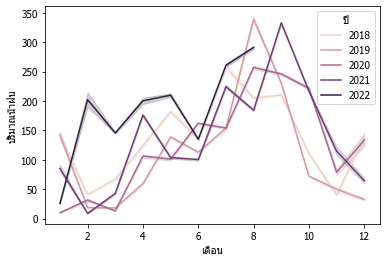

In [40]:
df =data_df1
sns.lineplot(x = "เดือน", y = "ปริมาณน้ำฝน", hue='ปี', data = df)
plt.show()

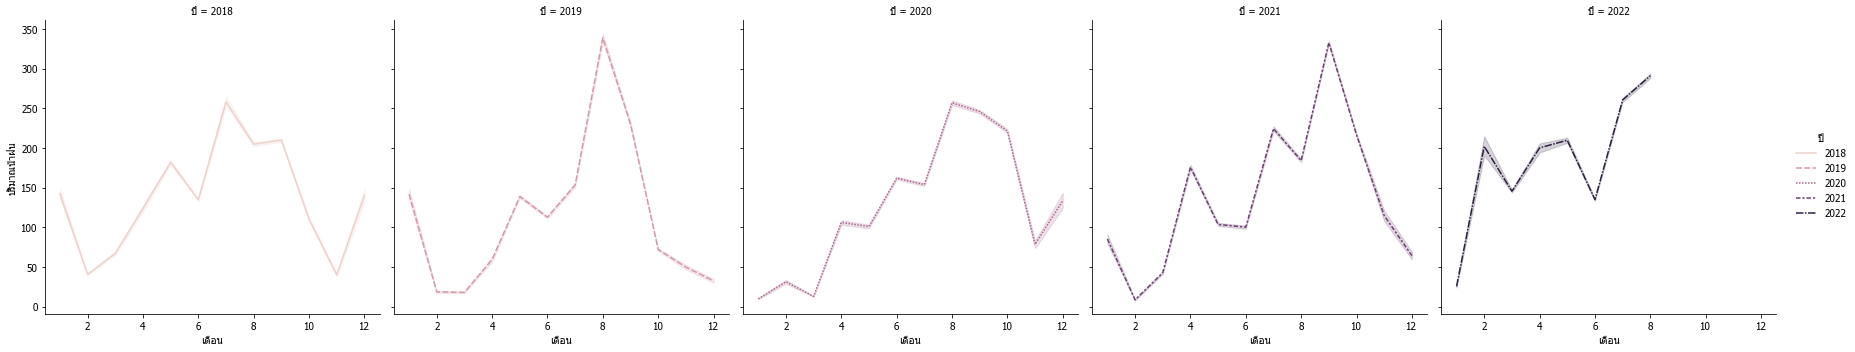

In [41]:
data=data_df1
ax1=sns.relplot(data=data, kind="line",x="เดือน", y="ปริมาณน้ำฝน", col="ปี",hue="ปี", style="ปี")

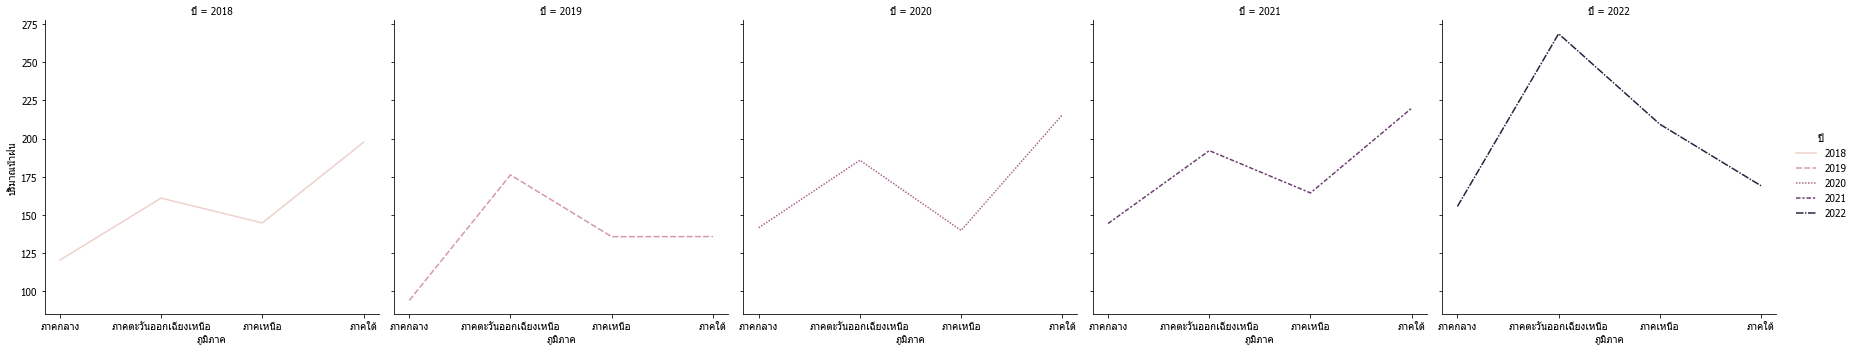

In [42]:
Region=data_df1.groupby(['ปี','ภูมิภาค'])[['ปริมาณน้ำฝน']].agg('mean')
Region.sort_values( ['ปริมาณน้ำฝน'], ascending=[False])
data=Region
ax5=sns.relplot(data=data, kind="line",x="ภูมิภาค", y="ปริมาณน้ำฝน", col="ปี",hue="ปี", style="ปี")
#ax5 =data_month1.plot.bar(stacked=True)

In [43]:
data2022_df=data_df1[(data_df1['ปี']==2022) ][ ['ปี','เดือน','วันที่','ปริมาณน้ำฝน','ภูมิภาค','จังหวัด','ตำบล','อำเภอ','ความเสี่ยง'] ]
data2022_df1=data2022_df[(data2022_df['เดือน']==8) ][ ['ปี','เดือน','วันที่','ปริมาณน้ำฝน','ภูมิภาค','จังหวัด','ตำบล','อำเภอ','ความเสี่ยง'] ]
data2022_df1

,ปี,เดือน,วันที่,ปริมาณน้ำฝน,ภูมิภาค,จังหวัด,ตำบล,อำเภอ,ความเสี่ยง
6540,2022,8,2022-01-08,275.954967,ภาคกลาง,จังหวัดพระนครศรีอยุธยา,ต.หันตรา,อ.พระนครศรีอยุธยา,เสี่ยงต่ำ
6541,2022,8,2022-01-08,275.954967,ภาคกลาง,จังหวัดพระนครศรีอยุธยา,ต.คลองสวนพลู,อ.พระนครศรีอยุธยา,เสี่ยงต่ำ
6542,2022,8,2022-01-08,275.954967,ภาคกลาง,จังหวัดพระนครศรีอยุธยา,ต.ท่าเรือ,อ.ท่าเรือ,เสี่ยงต่ำ
6543,2022,8,2022-01-08,275.954967,ภาคกลาง,จังหวัดพระนครศรีอยุธยา,ต.จำปา,อ.ท่าเรือ,เสี่ยงต่ำ
6544,2022,8,2022-01-08,275.954967,ภาคกลาง,จังหวัดพระนครศรีอยุธยา,ต.ท่าหลวง,อ.ท่าเรือ,เสี่ยงต่ำ
...,...,...,...,...,...,...,...,...,...
104461,2022,8,2022-01-08,111.691929,ภาคกลาง,จังหวัดเพชรบุรี,ต.แก่งกระจาน,อ.แก่งกระจาน,เสี่ยงต่ำ
110681,2022,8,2022-01-08,142.576251,ภาคใต้,จังหวัดสุราษฎร์ธานี,ต.อิปัน,อ.พระแสง,เสี่ยงต่ำ
110682,2022,8,2022-01-08,142.576251,ภาคใต้,จังหวัดสุราษฎร์ธานี,ต.สินปุน,อ.พระแสง,เสี่ยงต่ำ
110683,2022,8,2022-01-08,142.576251,ภาคใต้,จังหวัดสุราษฎร์ธานี,ต.ไทรขึง,อ.พระแสง,เสี่ยงต่ำ


In [56]:
d=data2022_df1.describe()
d1=d.drop( columns=['ปี','เดือน'] )
d1

,ปริมาณน้ำฝน
count,2724.000000
mean,290.999720
std,75.837365
min,111.691929
25%,245.607048
50%,274.607907
75%,308.339045
max,619.932706


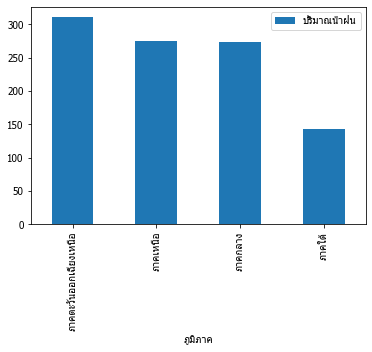

In [45]:
df_groupbyda1 = data2022_df1.groupby(['ภูมิภาค'])[['ปริมาณน้ำฝน']].agg('mean')
df_groupbyda2=df_groupbyda1.sort_values( ['ปริมาณน้ำฝน'], ascending=[False])
ax2 = df_groupbyda2.plot.bar(stacked=True)

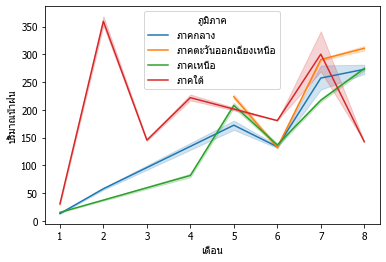

In [46]:
df2 =data2022_df
sns.lineplot(x = "เดือน", y = "ปริมาณน้ำฝน", hue='ภูมิภาค', data = df2)
plt.show()

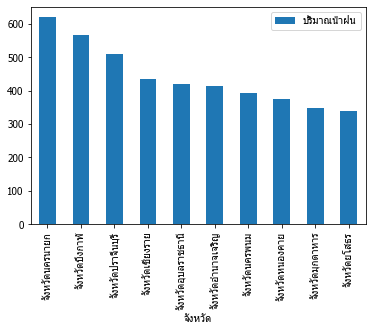

In [47]:
df_vol1=data2022_df1.groupby(['จังหวัด'])[['ปริมาณน้ำฝน']].agg('mean')
top10_df1=df_vol1.nlargest(n=10, columns=[ 'ปริมาณน้ำฝน'])
bx1 = top10_df1.plot.bar(stacked=True)


In [48]:
df_groupbyda3=data2022_df.groupby(['ความเสี่ยง'])[['ตำบล']].agg('count')
df_groupbyda3

,ตำบล
ความเสี่ยง,
เสี่ยงต่ำ,9347
เสี่ยงปานกลาง,1104
เสี่ยงสูง,34


Text(0.5, 1.0, 'จำนวนตำบล ตามประเภทความเสี่ยง')

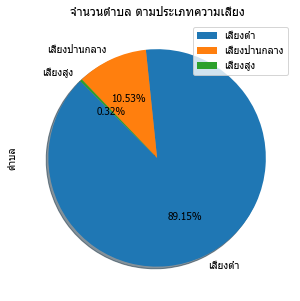

In [49]:
df1 = df_groupbyda3
plot = df1.plot.pie(y='ตำบล', figsize=(5, 5),autopct='%1.2f%%',shadow=True,startangle=135,)
plot.set_title('จำนวนตำบล ตามประเภทความเสี่ยง')

In [50]:
data2022_df4=data2022_df1[(data2022_df1['ความเสี่ยง']=='เสี่ยงสูง') ][ ['ปี','เดือน','วันที่','ปริมาณน้ำฝน','ภูมิภาค','จังหวัด','ตำบล','อำเภอ','ความเสี่ยง'] ]
data2022_df4.reset_index(drop=True)

,ปี,เดือน,วันที่,ปริมาณน้ำฝน,ภูมิภาค,จังหวัด,ตำบล,อำเภอ,ความเสี่ยง
0,2022,8,2022-01-08,565.142776,ภาคตะวันออกเฉียงเหนือ,จังหวัดบึงกาฬ,ต.โซ่,อ.โซ่พิสัย,เสี่ยงสูง
1,2022,8,2022-01-08,565.142776,ภาคตะวันออกเฉียงเหนือ,จังหวัดบึงกาฬ,ต.คำแก้ว,อ.โซ่พิสัย,เสี่ยงสูง
2,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.ดงเย็น,อ.บ้านดุง,เสี่ยงสูง
3,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.บ้านจันทน์,อ.บ้านดุง,เสี่ยงสูง
4,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.นาไหม,อ.บ้านดุง,เสี่ยงสูง
5,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.วังทอง,อ.บ้านดุง,เสี่ยงสูง
6,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.บ้านม่วง,อ.บ้านดุง,เสี่ยงสูง
7,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.จอมศรี,อ.เพ็ญ,เสี่ยงสูง
8,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.สร้างคอม,อ.สร้างคอม,เสี่ยงสูง
9,2022,8,2022-01-08,298.501703,ภาคตะวันออกเฉียงเหนือ,จังหวัดอุดรธานี,ต.บ้านหินโงม,อ.สร้างคอม,เสี่ยงสูง


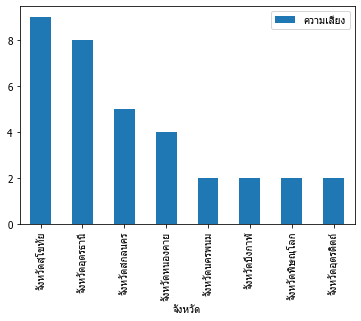

In [51]:
df_groupbyda4=data2022_df4.groupby(['จังหวัด'])[['ความเสี่ยง']].agg('count')
df_highrisk=df_groupbyda4.sort_values( ['ความเสี่ยง'], ascending=[False])
ax4 = df_highrisk.plot.bar(stacked=True)